In [1]:
## Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Reading NYT data
nyt_data = pd.read_csv('data/New_York_Times_us.csv')

In [3]:
#Getting Columns details
print(nyt_data.columns)

Index(['date', 'cases', 'deaths'], dtype='object')


In [4]:
#View sample data
nyt_data.head(2)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0


In [5]:
#Checking columns types
nyt_data.dtypes

date      object
cases      int64
deaths     int64
dtype: object

In [7]:
# Converting object type into date object 
nyt_data['date']= pd.to_datetime(nyt_data['date']).dt.date
nyt_data.dtypes

date      object
cases      int64
deaths     int64
dtype: object

In [8]:
# Checking null data for cases columns
nyt_data[nyt_data['cases'].isnull()].head()

,date,cases,deaths


In [9]:
# Checking null data for cases columns
nyt_data[nyt_data['deaths'].isnull()].head()

,date,cases,deaths


In [12]:
# Cleaning cases column - Converting non numeric data into NaN
nyt_data['cases'] = pd.to_numeric(nyt_data['cases'], errors='coerce')
# Droping NaN if any
nyt_data = nyt_data.dropna(subset=['cases'])
nyt_data.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [13]:
# Cleaning deaths column - Converting non numeric data into NaN
nyt_data['deaths'] = pd.to_numeric(nyt_data['deaths'], errors='coerce')
# Droping NaN if any
nyt_data = nyt_data.dropna(subset=['deaths'])
nyt_data.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [14]:
## Getting John Hopkins dataset
jh_data = pd.read_csv('data/Johns_Hopkins_dataset.csv')

In [15]:
#Getting Columns details
print(jh_data.columns)

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')


In [16]:
#View sample data
jh_data.head(2)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [17]:
#Checking data types
jh_data.dtypes

Date               object
Country/Region     object
Province/State     object
Lat               float64
Long              float64
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [18]:
# Filtering only US data first and then taking only required columns. Adding Confirmed and Deaths for now. Need to understand below
# statement "Remove any days that do not exist in both datasets."
jh_data = jh_data[(jh_data["Country/Region"]  == "US")]
jh_data= jh_data[["Date","Recovered","Confirmed","Deaths"]]
jh_data.rename(columns={'Date': 'date','Confirmed':'cases','Deaths':'deaths'}, inplace=True)

In [19]:
jh_data.head()

,date,Recovered,cases,deaths
63404,2020-01-22,0.0,1,0
63405,2020-01-23,0.0,1,0
63406,2020-01-24,0.0,2,0
63407,2020-01-25,0.0,2,0
63408,2020-01-26,0.0,5,0


In [20]:
# Converting object type into date object 
jh_data['date']= pd.to_datetime(jh_data['date']).dt.date
jh_data.dtypes

date          object
Recovered    float64
cases          int64
deaths         int64
dtype: object

In [21]:
# Checking null data
jh_data[jh_data['Recovered'].isnull()].head()

,date,Recovered,cases,deaths


In [22]:
# Converting non numeric data into NaN
jh_data['Recovered'] = pd.to_numeric(jh_data['Recovered'], errors='coerce')
# Droping NA if any
jh_data = jh_data.dropna(subset=['Recovered'])
jh_data['Recovered'] = jh_data['Recovered'].apply(np.int64)
jh_data.head()

,date,Recovered,cases,deaths
63404,2020-01-22,0,1,0
63405,2020-01-23,0,1,0
63406,2020-01-24,0,2,0
63407,2020-01-25,0,2,0
63408,2020-01-26,0,5,0


In [23]:
# CLeaning cases
jh_data['cases'] = pd.to_numeric(jh_data['cases'], errors='coerce')
jh_data = jh_data.dropna(subset=['cases'])
jh_data['cases'] = jh_data['cases'].apply(np.int64)
jh_data.head()

,date,Recovered,cases,deaths
63404,2020-01-22,0,1,0
63405,2020-01-23,0,1,0
63406,2020-01-24,0,2,0
63407,2020-01-25,0,2,0
63408,2020-01-26,0,5,0


In [24]:
# CLeaning deaths
jh_data['deaths'] = pd.to_numeric(jh_data['deaths'], errors='coerce')
jh_data = jh_data.dropna(subset=['deaths'])
jh_data['deaths'] = jh_data['deaths'].apply(np.int64)
jh_data.head()

,date,Recovered,cases,deaths
63404,2020-01-22,0,1,0
63405,2020-01-23,0,1,0
63406,2020-01-24,0,2,0
63407,2020-01-25,0,2,0
63408,2020-01-26,0,5,0


In [25]:
## Joining data sets
covid19US = pd.merge(nyt_data,jh_data[['date','Recovered']], how='inner', on = 'date')
covid19US.head()

,date,cases,deaths,Recovered
0,2020-01-22,1,0,0
1,2020-01-23,1,0,0
2,2020-01-24,2,0,0
3,2020-01-25,3,0,0
4,2020-01-26,5,0,0


<AxesSubplot:>

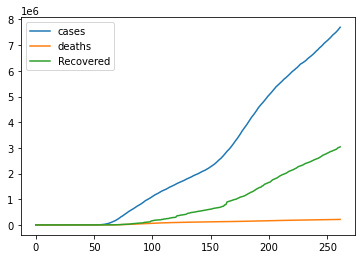

In [26]:
covid19US.plot(kind='line')